<a href="https://www.kaggle.com/code/amarmoibrahim964/heart-disease?scriptVersionId=140103981" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Heart Disease Analysis

![/kaggle/input/heart-img/heart1.jpg](https://cdn-prod.medicalnewstoday.com/content/images/articles/322/322237/man-with-chest-pains-and-heart-disease.jpg)


# import our Libraries and data

In [1]:

# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#import our data
data= pd.read_csv('../input/heart-disease-dataset/heart.csv', sep =',',encoding ='utf-8')

# Exploring data

In [3]:
#show the frist 10 columns
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
#show the last 5 columns
data.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
#name of culomns
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
#rename columns in a pandas DataFrame
data.rename(columns={'cp':'chest pain','trestbps':'blood pressure','chol':'cholestoral','fbs':'sugar test','restecg':'elect_result','thalach':'max heart rate','exang':'exercise angina','ca':'num of vessels'},inplace=True)

In [7]:
#how many columns and rows
data.shape

(1025, 14)

In [8]:
#Get Information About Our Dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1025 non-null   int64  
 1   sex              1025 non-null   int64  
 2   chest pain       1025 non-null   int64  
 3   blood pressure   1025 non-null   int64  
 4   cholestoral      1025 non-null   int64  
 5   sugar test       1025 non-null   int64  
 6   elect_result     1025 non-null   int64  
 7   max heart rate   1025 non-null   int64  
 8   exercise angina  1025 non-null   int64  
 9   oldpeak          1025 non-null   float64
 10  slope            1025 non-null   int64  
 11  num of vessels   1025 non-null   int64  
 12  thal             1025 non-null   int64  
 13  target           1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Missing Values

In [9]:
#Check Null Values In The Dataset
data.isnull().sum()

age                0
sex                0
chest pain         0
blood pressure     0
cholestoral        0
sugar test         0
elect_result       0
max heart rate     0
exercise angina    0
oldpeak            0
slope              0
num of vessels     0
thal               0
target             0
dtype: int64

# Duplicate Values

In [10]:
# Check For Duplicate Data
dup=data.duplicated().any()
#we ask if there are any Duplicate Data 
print("Any duplicate Value?",dup)


Any duplicate Value? True


In [11]:
#the answer was True so we will drop the Duplicate Data 
data=data.drop_duplicates()

In [12]:
#check our data set after drop the duplicate data 
data.shape

(302, 14)

In [13]:
#Get Overall Statistics About The Dataset
data.describe()

,age,sex,chest pain,blood pressure,cholestoral,sugar test,elect_result,max heart rate,exercise angina,oldpeak,slope,num of vessels,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

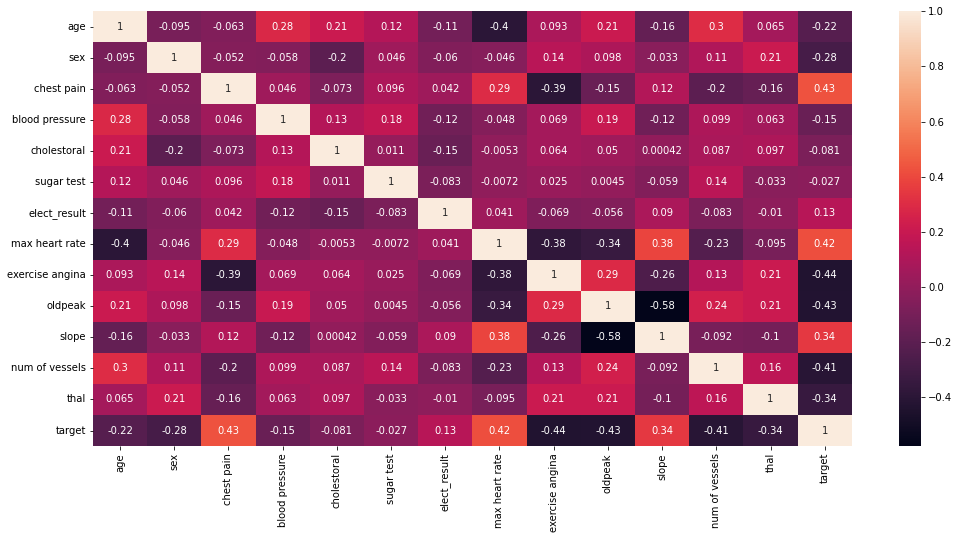

In [14]:
#find Correlation Matrix and drow it
plt.figure(figsize=(17,8))
sns.heatmap(data.corr(),annot=True) 

In [15]:
data.columns

Index(['age', 'sex', 'chest pain', 'blood pressure', 'cholestoral',
       'sugar test', 'elect_result', 'max heart rate', 'exercise angina',
       'oldpeak', 'slope', 'num of vessels', 'thal', 'target'],
      dtype='object')

In [16]:
data

,age,sex,chest pain,blood pressure,cholestoral,sugar test,elect_result,max heart rate,exercise angina,oldpeak,slope,num of vessels,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


# Data visualization

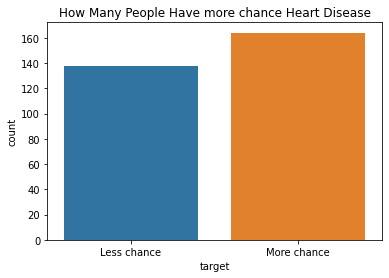

In [17]:
# How Many People Have Heart Disease, And How Many Don't Have Heart Disease
sns.countplot(x='target',data=data)
plt.xticks([0,1],['Less chance','More chance'])
plt.title("How Many People Have more chance Heart Disease")
plt.show()

In [18]:

data.target.value_counts()

1    164
0    138
Name: target, dtype: int64

In [19]:
#Find Count of  Male & Female in this Datase
data.sex.value_counts()

1    206
0     96
Name: sex, dtype: int64

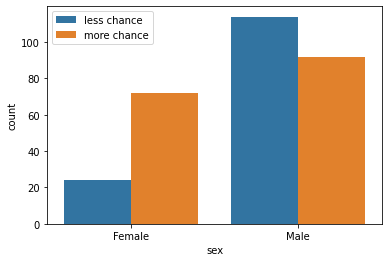

In [20]:
#Find Count of  Male & Female in this Datase

sns.countplot(x='sex',hue="target",data=data)
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['less chance','more chance'])
plt.show()


In [21]:
data.columns

Index(['age', 'sex', 'chest pain', 'blood pressure', 'cholestoral',
       'sugar test', 'elect_result', 'max heart rate', 'exercise angina',
       'oldpeak', 'slope', 'num of vessels', 'thal', 'target'],
      dtype='object')

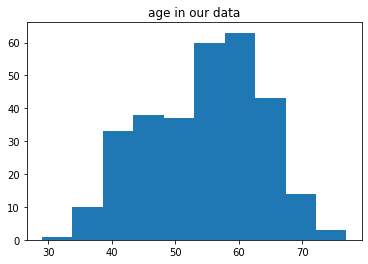

In [22]:
#Check Age Distribution In The Dataset
plt.hist(data['age'])
plt.title ("age in our data")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


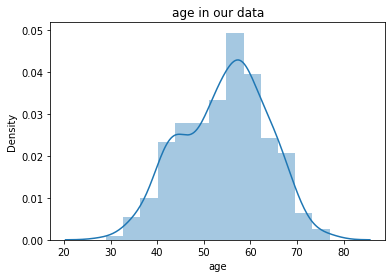

In [23]:
sns.distplot(data['age'])
plt.title ("age in our data")
plt.show()

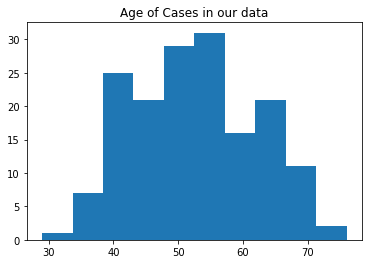

In [24]:
#Check Age Distribution of Patients In The Dataset
age_sick=data[data['target']==1]['age']

plt.hist([age_sick])
plt.title ("Age of Cases in our data")
plt.show()

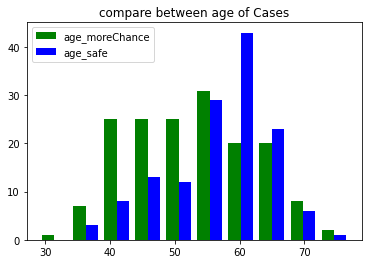

In [25]:
#Compare between age of people have heart disease and other
age_sick=data[data['target']==1]['age']
age_safe=data[data['target']==0]['age']
plt.hist([age_sick,age_safe],histtype='bar',align='mid',color=['g','b'],label=['age_moreChance','age_safe'] )
plt.title ("compare between age of Cases")
plt.legend()
plt.show()

In [26]:
data.columns

Index(['age', 'sex', 'chest pain', 'blood pressure', 'cholestoral',
       'sugar test', 'elect_result', 'max heart rate', 'exercise angina',
       'oldpeak', 'slope', 'num of vessels', 'thal', 'target'],
      dtype='object')

In [27]:
#Check Chest Pain Type
data["chest pain"].unique()

array([0, 1, 2, 3])

In [28]:
#Find Count of Chest Pain in this Dataset
data["chest pain"].value_counts()

0    143
2     86
1     50
3     23
Name: chest pain, dtype: int64

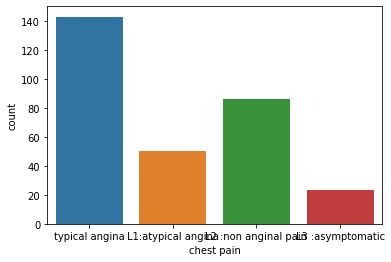

In [29]:
#drow Chest Pain level
sns.countplot(x='chest pain',data=data)
plt.xticks([0,1,2,3],['typical angina','L1:atypical angina','L2 :non anginal pain','L3 :asymptomatic'])

plt.show()

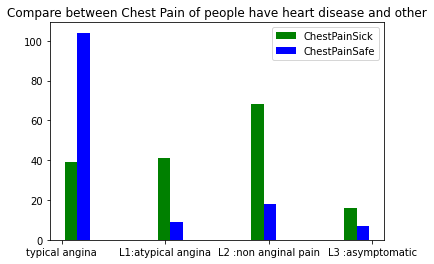

In [30]:
#Show The Chest Pain Distribution As Per Target Variable
#Compare between age of people have heart disease and other
ChestPainSick=data[data['target']==1]['chest pain']
ChestPainSafe=data[data['target']==0]['chest pain']
plt.hist([ChestPainSick,ChestPainSafe],histtype='bar',align='mid',color=['g','b'],label=['ChestPainSick','ChestPainSafe'] )
plt.xticks([0,1,2,3],['typical angina','L1:atypical angina','L2 :non anginal pain','L3 :asymptomatic'])
plt.title ("Compare between Chest Pain of people have heart disease and other")
plt.legend()
plt.show()

In [31]:
data.columns

Index(['age', 'sex', 'chest pain', 'blood pressure', 'cholestoral',
       'sugar test', 'elect_result', 'max heart rate', 'exercise angina',
       'oldpeak', 'slope', 'num of vessels', 'thal', 'target'],
      dtype='object')

In [32]:
#Show Fasting Blood Sugar Distribution According To Target Variable
data["sugar test"].unique()


array([0, 1])

In [33]:
data["sugar test"].value_counts()

0    257
1     45
Name: sugar test, dtype: int64

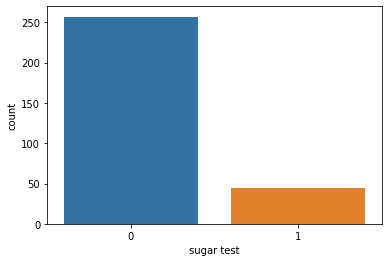

In [34]:
#Show Fasting Blood Sugar Distribution in our data
sns.countplot(x='sugar test',data=data)
#plt.xticks([0,1,],['zero','Level 1','Level 2','Level 3'])
plt.show()

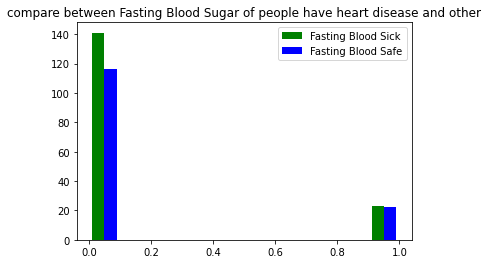

In [35]:
#Show Fasting Blood Sugar Distribution According To Target Variable
fastingBloodSick=data[data['target']==1]['sugar test']
fastingBloodSafe=data[data['target']==0]['sugar test']
plt.hist([fastingBloodSick,fastingBloodSafe],histtype='bar',align='mid',color=['g','b'],label=['Fasting Blood Sick','Fasting Blood Safe'] )
#plt.xticks([0,1,2,3],['zero','Level 1','Level 2','Level 3'])
plt.title ("compare between Fasting Blood Sugar of people have heart disease and other")
plt.legend()
plt.show()

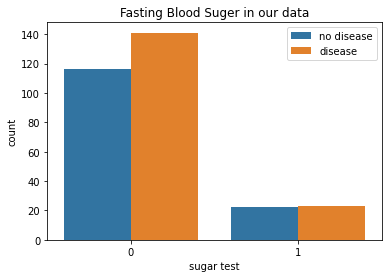

In [36]:
sns.countplot(x='sugar test',hue="target",data=data)
plt.title ("Fasting Blood Suger in our data")
plt.legend(labels=["no disease" ,"disease"])
plt.show()


In [37]:
data.columns

Index(['age', 'sex', 'chest pain', 'blood pressure', 'cholestoral',
       'sugar test', 'elect_result', 'max heart rate', 'exercise angina',
       'oldpeak', 'slope', 'num of vessels', 'thal', 'target'],
      dtype='object')

In [38]:
data['blood pressure']

0      125
1      140
2      145
3      148
4      138
      ... 
723    120
733    108
739    128
843    160
878    120
Name: blood pressure, Length: 302, dtype: int64

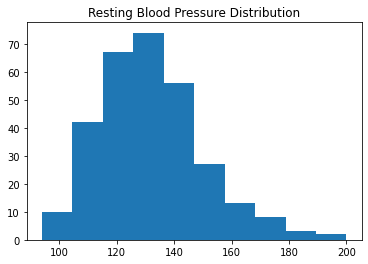

In [39]:
# Check Resting Blood Pressure Distribution
plt.hist(data['blood pressure'])
plt.title ("Resting Blood Pressure Distribution")
plt.show()

<AxesSubplot:>

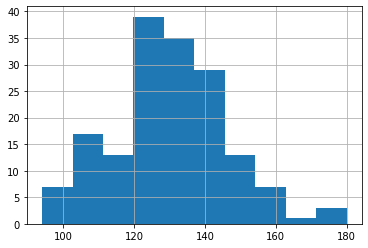

In [40]:
# Check Resting Blood Pressure Distribution of the Patients

BPofPatients=data[data['target']==1]['blood pressure']
BPofPatients.hist()

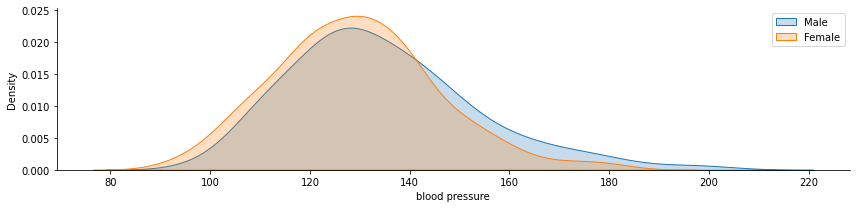

In [41]:
#Compare Resting Blood Pressure As Per Sex Column
g=sns.FacetGrid(data,hue="target",aspect=4)
g.map(sns.kdeplot,'blood pressure',shade=True)
plt.legend(labels=["Male" ,"Female"])


In [42]:

data

,age,sex,chest pain,blood pressure,cholestoral,sugar test,elect_result,max heart rate,exercise angina,oldpeak,slope,num of vessels,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


# Data Processing

In [43]:
categ=[]
cont=[]

for column in data.columns:
    if data[column].nunique()<=10:
        categ.append(column)
    else :
        cont.append(column)

In [44]:
categ

['sex',
 'chest pain',
 'sugar test',
 'elect_result',
 'exercise angina',
 'slope',
 'num of vessels',
 'thal',
 'target']

# Encoding Categorical Data

In [45]:
categ.remove('sex')
categ.remove('target')
data=pd.get_dummies(data,columns=categ,drop_first=True)

In [46]:
data.head()

,age,sex,blood pressure,cholestoral,max heart rate,oldpeak,target,chest pain_1,chest pain_2,chest pain_3,...,exercise angina_1,slope_1,slope_2,num of vessels_1,num of vessels_2,num of vessels_3,num of vessels_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# Feature Scaling

Why do we need scaling?
Machine learning algorithm just sees number — if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model.

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
st=StandardScaler()
data[cont]=st.fit_transform(data[cont])

In [49]:
data

,age,sex,blood pressure,cholestoral,max heart rate,oldpeak,target,chest pain_1,chest pain_2,chest pain_3,...,exercise angina_1,slope_1,slope_2,num of vessels_1,num of vessels_2,num of vessels_3,num of vessels_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


Store Feature Matrix In X and Response(Target) In Vector y

In [50]:
x= data.drop(['target'],axis=1)
y = data['target']

In [51]:
x.head()

,age,sex,blood pressure,cholestoral,max heart rate,oldpeak,chest pain_1,chest pain_2,chest pain_3,sugar test_1,...,exercise angina_1,slope_1,slope_2,num of vessels_1,num of vessels_2,num of vessels_3,num of vessels_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0


# Train/Test split
      1.Split data into two-part: a training set and a testing set
      2. Train the model(s) on the training set
      3. Test the Model(s) on the Testing set

In [52]:
from sklearn.model_selection import train_test_split 

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

#  LogisticRegression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [57]:
y_pred1 = log.predict(x_test)

 Evaluating the Algorithm of LogisticRegression

In [58]:
from sklearn.metrics import accuracy_score 

In [59]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

# Non-Linear ML Algorithms
# Random Forest Classifier 

In [60]:
#import our data
df= pd.read_csv('../input/heart-disease-dataset/heart.csv', sep =',',encoding ='utf-8')
#rename columns in a pandas DataFrame
df.rename(columns={'cp':'chest pain','trestbps':'blood pressure','chol':'cholestoral','fbs':'sugar test','restecg':'elect_result','thalach':'max heart rate','exang':'exercise angina','ca':'num of vessels'},inplace=True)

#the answer was True so we will drop the Duplicate Data 
df=df.drop_duplicates()
df

,age,sex,chest pain,blood pressure,cholestoral,sugar test,elect_result,max heart rate,exercise angina,oldpeak,slope,num of vessels,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


Store Feature Matrix In X and Response(Target) In Vector y

In [61]:
x = df.drop(['target'],axis=1)
y = df['target']

 Train/Test split
   

In [62]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


Fitting the Model

In [63]:
from sklearn.ensemble import RandomForestClassifier
cf = RandomForestClassifier()
cf.fit(x_train,y_train)

RandomForestClassifier()

 Evaluating the Algorithm of LogisticRegression

In [64]:
y_pred2 = cf.predict(x_test)

In [65]:
accuracy_score(y_test,y_pred2)

0.819672131147541

As the result, we found Random Forest Classifier model is better Logistic Regression